In [8]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM
from keras.callbacks import ModelCheckpoint

In [2]:
# NUM_THREADS = 8
# import tensorflow as tf
# tf.config.threading.set_intra_op_parallelism_threads(num_threads=NUM_THREADS)
# tf.config.threading.set_inter_op_parallelism_threads(num_threads=NUM_THREADS)


In [2]:
df = pd.read_feather('data/dataset.feather')

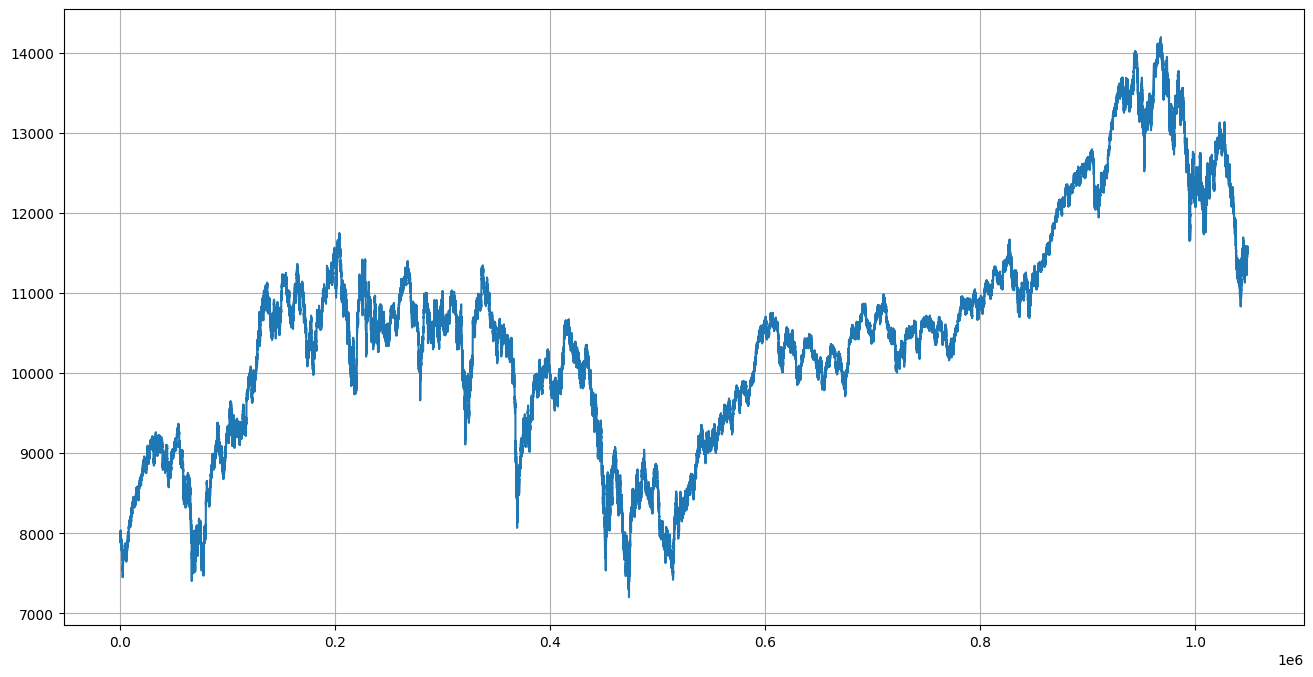

In [3]:
plt.figure(figsize=(16,8))
plt.plot(df['VALUE'])
plt.grid(True)

In [4]:
min_val = np.min(df['VALUE'])
max_val = np.max(df['VALUE'])

# Normalize the array
train_data = (df['VALUE'].values - min_val) / (max_val - min_val)

print(train_data)

[0.10363717 0.10378013 0.1040646  ... 0.62437476 0.62489797 0.62518959]


In [5]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['VALUE'])

scaled_data

ValueError: Expected 2D array, got 1D array instead:
array=[ 7925.93  7926.93  7928.92 ... 11568.63 11572.29 11574.33].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [5]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(800, len(train_data)):
    x_train.append(train_data[i-800:i])
    y_train.append(train_data[i])
    if i<= 801:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.10363717, 0.10378013, 0.1040646 , 0.10417182, 0.10435051,
       0.10438625, 0.10435051, 0.10431477, 0.10435051, 0.10452777,
       0.10470647, 0.10467073, 0.10527542, 0.10556133, 0.10566712,
       0.10541838, 0.10531116, 0.10523968, 0.1051339 , 0.10516964,
       0.10516964, 0.1051339 , 0.1051339 , 0.10527542, 0.1051339 ,
       0.10509816, 0.10509816, 0.10495521, 0.10502668, 0.10488373,
       0.10484799, 0.10484799, 0.10484799, 0.10509816, 0.10509816,
       0.10520394, 0.10499094, 0.10502668, 0.10491947, 0.10491947,
       0.10484799, 0.1047422 , 0.10470647, 0.10459925, 0.1047422 ,
       0.10481225, 0.10481225, 0.10499094, 0.10484799, 0.10488373,
       0.10467073, 0.1044563 , 0.10456351, 0.1044563 , 0.10438625,
       0.10438625, 0.10442056, 0.1044563 , 0.10392308, 0.10395882,
       0.10402887, 0.10402887, 0.10410034, 0.10413608, 0.10427903,
       0.10413608, 0.1040646 , 0.1038516 , 0.10356712, 0.10370865,
       0.10353139, 0.10374439, 0.10370865, 0.10335269, 0.1032

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

checkpoint_callback = ModelCheckpoint(
    filepath='model/model_checkpoint_epoch_{epoch:02d}.h5',  # I have added an epoch format to save with the epoch number
    save_best_only=False,  # If set to True, only saves when the model is considered the "best"
    verbose=1  # Verbosity mode
)

# Train the model
model.fit(x_train, y_train, batch_size=512, epochs=2, callbacks=[checkpoint_callback])

Epoch 1/2
2047/2047 [==============================] - ETA: 0s - loss: 3.3293e-04
Epoch 1: saving model to model/model_checkpoint_epoch_01.h5
2047/2047 [==============================] - 5603s 3s/step - loss: 3.3293e-04
Epoch 2/2


/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2047/2047 [==============================] - ETA: 0s - loss: 4.4899e-06
Epoch 2: saving model to model/model_checkpoint_epoch_02.h5
2047/2047 [==============================] - 5581s 3s/step - loss: 4.4899e-06


In [10]:
model.save('model/lstm_model.h5')

In [ ]:
model = load_model('model/lstm_model.h5')

In [11]:
from src.utils import clean_list, resample_non_drop

test_df = pd.read_excel('data/OIL_WEEKLY.xlsx', engine='openpyxl')
test_list = test_df[test_df.columns[1]].tolist()
test_list = clean_list(test_list)
len(test_list)


850

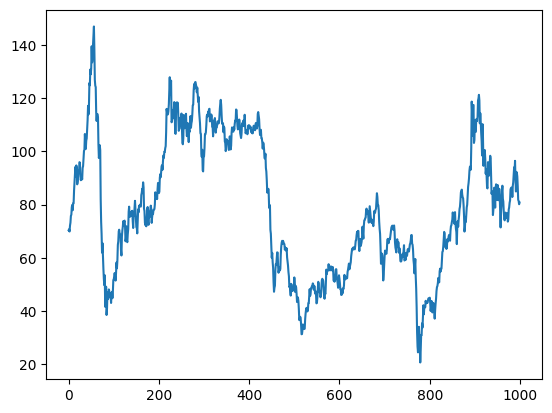

In [12]:
if len(test_list) != 1000:
    test_list = resample_non_drop(test_list, 1000)

plt.plot(test_list)

In [13]:
test_max = np.max(test_list)
test_min = np.min(test_list)

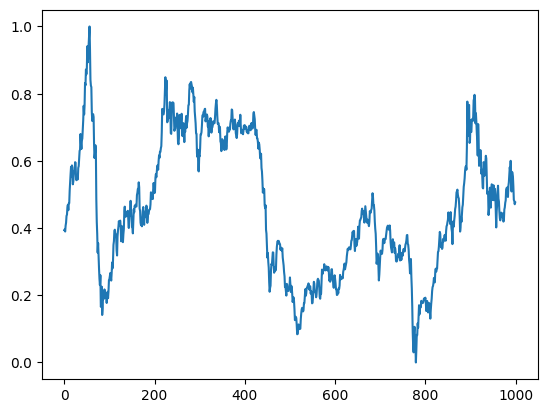

In [14]:
test_data = (test_list - test_min) / (test_max - test_min)
plt.plot(test_data)

1/1 [==============================] - 1s 649ms/step
0.17811513
1/1 [==============================] - 0s 69ms/step
0.1806316
1/1 [==============================] - 0s 64ms/step
0.18240291
1/1 [==============================] - 0s 65ms/step
0.18368119
1/1 [==============================] - 0s 63ms/step
0.1846377
1/1 [==============================] - 0s 59ms/step
0.18538755
1/1 [==============================] - 0s 60ms/step
0.1860074
1/1 [==============================] - 0s 61ms/step
0.18654715
1/1 [==============================] - 0s 61ms/step
0.18703909
1/1 [==============================] - 0s 64ms/step
0.1875035
1/1 [==============================] - 0s 61ms/step
0.18795289
1/1 [==============================] - 0s 61ms/step
0.18839473
1/1 [==============================] - 0s 62ms/step
0.18883327
1/1 [==============================] - 0s 67ms/step
0.18927081
1/1 [==============================] - 0s 60ms/step
0.18970855
1/1 [==============================] - 0s 63ms/step
0.1901

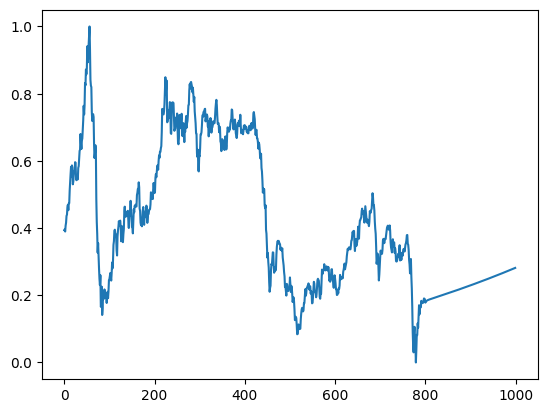

In [15]:
prediction_list = test_data[:800].tolist()

for i in range(200):
    x = np.array(prediction_list[-800:]).reshape(1, 800, 1)
    predicted_price = model.predict(x)[0][0]
    print(predicted_price)
    prediction_list.append(predicted_price)

plt.plot(prediction_list)

In [1]:
plt.figure(figsize=(16,8))
plt.plot(test_data, label='Test', color='blue')
plt.plot(np.arange(800, 1000), prediction_list[800:], label='Prediction', color='red')
plt.grid(True)

NameError: name 'plt' is not defined